In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers, preprocessing

In [3]:
real = pd.read_csv("D:/Intern/DataSets/True_News.csv")
fake = pd.read_csv("D:/Intern/DataSets/Fake_News.csv")

In [4]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
print(real.shape, fake.shape)

(21417, 4) (23481, 4)


In [7]:
real['label'] = 1
fake['label'] = 0

In [8]:
df = pd.concat([real, fake], axis=0)

In [11]:
df.shape

(44898, 5)

In [12]:
df = df.sample(frac=1).reset_index(drop=True) # Shuffle the data

In [13]:
df.head()

,title,text,subject,date,label
0,South Korea says Trump's warning to North Kore...,SEOUL/TOKYO (Reuters) - U.S. President Donald ...,worldnews,"September 20, 2017",1
1,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,left-news,"Dec 30, 2015",0
2,"This Trump Supporter Is Going To Jail, And He...",While Donald Trump has staked a large part of ...,News,"March 25, 2016",0
3,Trump: 'Tinge' of sadness over losing Iowa,"MILFORD, New Hampshire (Reuters) - Donald Trum...",politicsNews,"February 3, 2016",1
4,UK govt. accepts lawmakers' demands for scruti...,LONDON (Reuters) - The British government will...,worldnews,"December 11, 2017",1


In [14]:
text = df["title"] + " " + df["text"]
label = df["label"].values

In [16]:
max_words = 10000
max_len = 300

In [17]:
tokenizer = preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")

tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)
data = preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

In [18]:
X_train, X_test,  y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label, random_state=42)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35918, 300) (35918,)
(8980, 300) (8980,)


In [27]:
model = models.Sequential([
	layers.Input(shape=(X_train.shape[1],)), # 300
	layers.Embedding(input_dim=max_words, output_dim=128),
	layers.SpatialDropout1D(0.2),
	layers.SimpleRNN(128, activation='tanh', dropout=0.3, recurrent_dropout=0.3),
	layers.Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 300, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,025 (5.01 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.6830 - loss: 0.5590 - val_accuracy: 0.7091 - val_loss: 0.5118
Epoch 2/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 55ms/step - accuracy: 0.7320 - loss: 0.4987 - val_accuracy: 0.7953 - val_loss: 0.4496
Epoch 3/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 73s 65ms/step - accuracy: 0.7730 - loss: 0.4485 - val_accuracy: 0.8268 - val_loss: 0.3921
Epoch 4/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 59s 53ms/step - accuracy: 0.8061 - loss: 0.4001 - val_accuracy: 0.8567 - val_loss: 0.3450
Epoch 5/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - accuracy: 0.8373 - loss: 0.3511 - val_accuracy: 0.8684 - val_loss: 0.3081
Epoch 6/6
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 47s 42ms/step - accuracy: 0.8566 - loss: 0.3153 - val_accuracy: 0.8729 - val_loss: 0.2831


In [31]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss: ", loss, "Accuracy: ", acc)

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8729 - loss: 0.2831
Loss:  0.28309834003448486 Accuracy:  0.8729398846626282


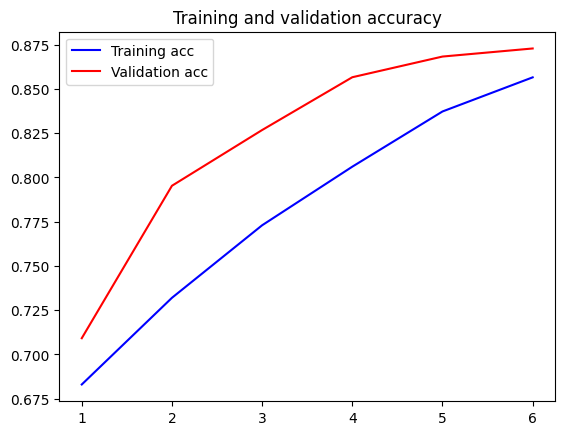

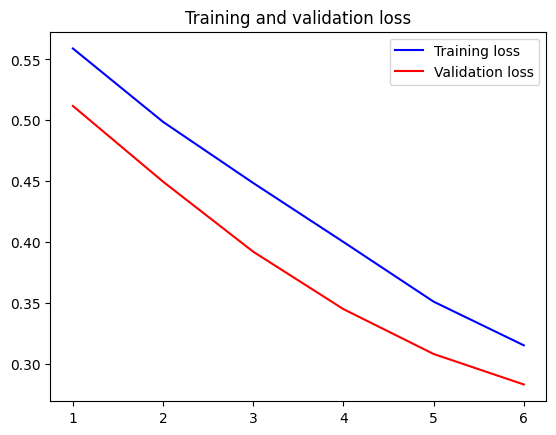

In [32]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
sample = ["Trump is a liar", "Trump is the best"]

sample = tokenizer.texts_to_sequences(sample)
sample = preprocessing.sequence.pad_sequences(sample, maxlen=max_len)

print(model.predict(sample)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.6892874]
 [0.7026253]]
